<b><h2> Data processing and data derivation</h2></b>

Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from scipy import stats
from scipy.stats import skew 
from scipy.stats import kurtosis 
from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz
from six import StringIO
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

Load the dataset

In [2]:
hotel_data = pd.read_csv("hotel_bookings.csv")

View top and botton few rows of hotel data

In [3]:
hotel_data.head(5)#top 5 rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hotel_data.tail(5)#bottom few rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


Check the data type for each column variable.

In [5]:
hotel_data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Number of rows and columns in the hotel data

In [6]:
hotel_data.shape

(119390, 32)

To check for the missing values

In [7]:
hotel_data.isna().sum() #return the sum of missing values present for each column

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

The above result shows that the agent,country,children and company has few missing values. The company column has most of the missing values so replacing it with any other value won't make sense. So simply dropping the column.

In [8]:
hotel_data = hotel_data.drop('company',axis=1) #company column removed from hotel table
hotel_data.shape #to see the data size after column is removed

(119390, 31)

Agent column contains id of the agent through whom booking has been done .Now, people who have done the booking directly without any agent won't have agent id. So simply assuming that all the NAN values in agent column represents the booking has been done directly by the customer. So simply replacing NAN values with 0. 

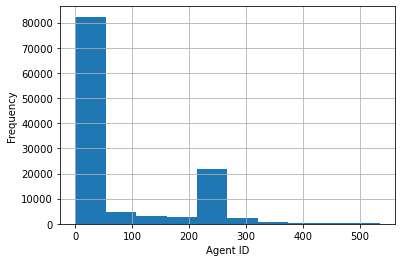

In [9]:
hotel_data["agent"]= hotel_data["agent"].fillna(0) #fill nan with 0
hotel_data["agent"].hist() #to view agent column distribution through histogram
plt.xlabel("Agent ID")
plt.ylabel("Frequency")
plt.show()

For the country column,the most common country in the dataset is PRT (portugal).So replacing the nan with prt (mode value).

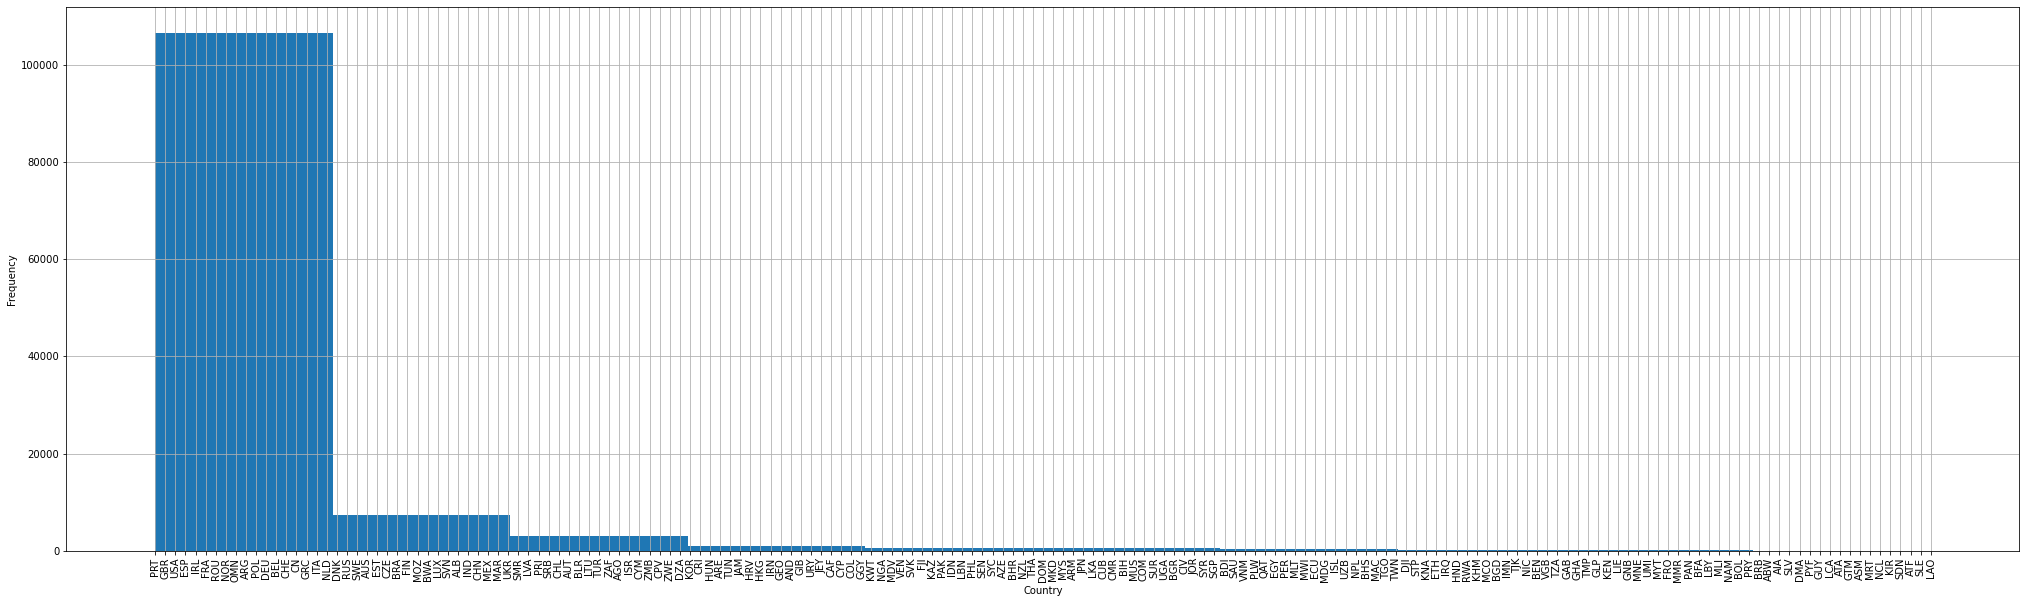

In [10]:
plt.figure(figsize=(35,10))
hotel_data["country"] = hotel_data["country"].fillna('PRT')#replacing nan with portugal
hotel_data["country"].hist()#plotting country column on histogram
plt.xticks(rotation=90)#rotating country names on x-axis

#setting labels for x and y axis
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.show()

Children column have only 4 missing values.So, filling missing values with 0 assuming ,there were no children for those guest.

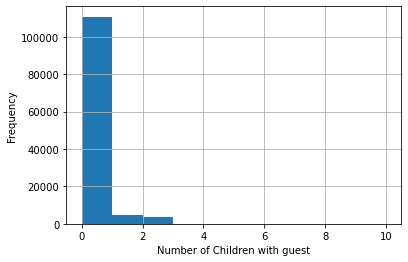

In [11]:
hotel_data["children"]= hotel_data["children"].fillna(0) #fill nan with 0
hotel_data["children"].hist() #plot histogram for children column

#setting labels for x and y axis
plt.xlabel("Number of Children with guest")
plt.ylabel("Frequency")
plt.show()

Check the summary statistics for hotel data

In [12]:
hotel_data.describe() #to get summary description

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


Rename few columns to make it more readable
<br>
arrival_date_week_numberr - which is week of the year
<br>
meal- type of meal booked
<br>
adr (average daily rate) - average daily rate


In [13]:
hotel_data = hotel_data.rename(columns = {"arrival_date_week_number":"arrival_week_no",
"meal":"type_of_meal_booked",
"adr":"avg_daily_rate"
})

Looking at the updated table with updated column heads

In [14]:
hotel_data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_week_no,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,avg_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


Checking datatype for each column

In [15]:
hotel_data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_week_no                     int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
type_of_meal_booked                object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

The datatype of children and agent is float. These column cannot have decimal values . So, changing there datatype to integer 

In [16]:
hotel_data[["agent","children"]] = hotel_data[["agent","children"]].astype('int')


To verify the datatypes for both the columns after it has been changed

In [17]:
assert hotel_data["agent"].dtypes=='int'

In [18]:
assert hotel_data["children"].dtypes=='int'

To convert reservation_status_date to numeric datatype.

In [19]:
hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'])

Calculating total number of days guest stayed in the hotel by combining records of weekdays data and weekend days data.

In [20]:
total_stay_days = hotel_data["stays_in_weekend_nights"] + hotel_data["stays_in_week_nights"] #getting total days guest stayed at hotel
hotel_data["total_days_of_stay"] = total_stay_days #adding new column to hotel_data with total number of night stay days for guest
hotel_data.head(5)#printing first 5 rows of hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_week_no,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,avg_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_days_of_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


Replacing string values of month into the numebers

In [21]:
#each month name is replaced by the number
hotel_data["arrival_date_month"] = hotel_data["arrival_date_month"].replace({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12})
hotel_data["arrival_date_month"]

0         7
1         7
2         7
3         7
4         7
         ..
119385    8
119386    8
119387    8
119388    8
119389    8
Name: arrival_date_month, Length: 119390, dtype: int64

Creating a column of arrival date by combining value from column arrival_date_month, arrival_date_year and arrival_date.

In [22]:
dateInt=hotel_data['arrival_date_year'].astype(str) + hotel_data['arrival_date_month'].astype(str).str.zfill(2)+ hotel_data['arrival_date_day_of_month'].astype(str).str.zfill(2)
hotel_data['arrival_date'] = pd.to_datetime(dateInt, format='%Y%m%d')
hotel_data.head(5) #to check first few rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_week_no,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,avg_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_days_of_stay,arrival_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,2015-07-01
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,304,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,2015-07-01
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2015-07-01


Calculating total number of guest visiting the hotel by summing values from adults, children and babies column. 

In [23]:
total_guest = hotel_data["adults"]+hotel_data["children"]+hotel_data["babies"] #adding adults , children and babies that visted the hotel
hotel_data["total_guest"] = total_guest#adding new column with total guest information
hotel_data.head(5)#printing first few columns of the data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_week_no,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,avg_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_days_of_stay,arrival_date,total_guest
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2015-07-01,2
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2015-07-01,2
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,2015-07-01,1
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,2015-07-01,1
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2015-07-01,2


Calculating skewness, kurtosis for all numeric columns and storing the statistical records into separate dataframe.

In [24]:
statistics_record =[]  #empty list created for storing statistical records 
for a in hotel_data:
    #boxplot for visualizing the outliers
    if(is_numeric_dtype(hotel_data[a])):
        #computing statistics for each column (mean,standard deviation, skwe and kurtosis)
        stat_data = [a,hotel_data[a].mean(),hotel_data[a].std(),skew(hotel_data[a]),kurtosis(hotel_data[a])] #statistical data computation
        statistics_record.append(stat_data)#adding data to the empty list

#creating dataframe of statistical records
statistics_record_df = pd.DataFrame(np.array(statistics_record),columns = ["Column name","Mean","Standard Deviation","Skewness","Kurtosis"])
    

In [25]:
statistics_record_df

,Column name,Mean,Standard Deviation,Skewness,Kurtosis
0,is_canceled,0.37041628277075134,0.48291822659316763,0.5366716466173548,-1.711983543717017
1,lead_time,104.01141636652986,106.86309704798579,1.3465329547937892,1.6963275478254607
2,arrival_date_year,2016.156554150264,0.7074759445202401,-0.23258032965769215,-0.9945723562850697
3,arrival_date_month,6.552483457576011,3.090618686900191,-0.027616977853853204,-0.9945668409044544
4,arrival_week_no,27.16517296255968,13.605138355498454,-0.010014200222448031,-0.9860861353853956
5,arrival_date_day_of_month,15.798241058715135,8.78082947057908,-0.002000428845090873,-1.1871688562754295
6,stays_in_weekend_nights,0.9275986263506156,0.9986134945978056,1.3800291109266631,7.17371536618076
7,stays_in_week_nights,2.500301532791691,1.9082856150485297,2.8622132810247685,24.28348754596433
8,adults,1.8564033838679956,0.5792609988330665,18.31757461595262,1352.0584407397598
9,children,0.10388642264846303,0.39855522168187896,4.112618328160294,18.673631332736694


<b><h1>Data Analysis</h1></b>

<b> <h3>1. What was the cancellation ratio between the two types of hotels? </h3></b>

<b> Total number of bookings done with each hotel </b>

In [26]:
hotel_type_count = hotel_data.groupby("hotel")["hotel"].count()#total booking counts for each hotel
hotel_type_count

hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Total 79330 bookings were done with city hotel and 40060 bookings with resort hotel.

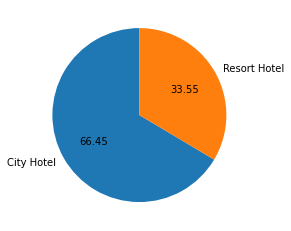

In [27]:
#to visualize the count of bookings for both hotels using pie chart
pie_labels = "City Hotel","Resort Hotel"
plt.pie(hotel_type_count,labels=pie_labels,autopct='%1.2f',startangle=90)#pie chart to visualize the distribution of data

plt.show()

So from the above data it can be seen that more number of people have opted for city hotel than the resort.

<b>Number of bookings which were cancelled for both type of hotels </b>

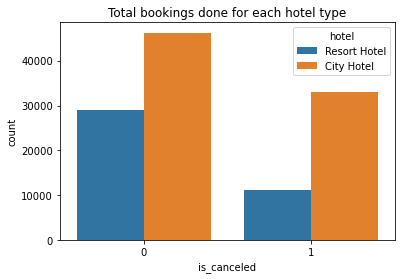

In [28]:
#countplot to count the bookings cancelled for each hotel
sns.countplot(x = "is_canceled",hue = "hotel",data = hotel_data)
plt.title("Total bookings done for each hotel type")#adding title to the plot
plt.show()

In [29]:
hotel_cancel_count = hotel_data.groupby("hotel")["is_canceled"].sum()#total number of booking that got canceled for each hotel type
hotel_cancel_count

hotel
City Hotel      33102
Resort Hotel    11122
Name: is_canceled, dtype: int64

Total 33102 booking got cancelled for city hotel and 11122 cancelled for resort hotel.

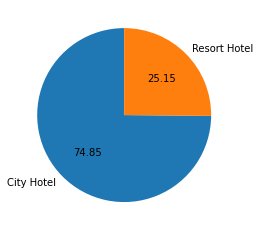

In [30]:
pie_labels = "City Hotel","Resort Hotel"
plt.pie(hotel_cancel_count,labels=pie_labels,autopct='%1.2f',startangle=90)#pie chart to visualize the distribution of data
plt.show()

<b>Now calculating the percentage of number of times booking was done for each hotel type and was cancelled. <b>

In [31]:
index =0 #setting index for list
hotel_cancel_rate = []#empty list
for a in hotel_cancel_count:
    #cancellation percentage for each hotel
    book_rate = (a/hotel_type_count[index])*100
    hotel_cancel_rate.append(book_rate) #adding percentage calculated to the list
    #to get the name of hotel
    hotel_name = pie_labels[index]
    #to increment index value
    index=index+1
    #to print the result
    print(f"{hotel_name} has got cancellation percentage of {round(book_rate)} % of the total bookings done.")

City Hotel has got cancellation percentage of 42 % of the total bookings done.
Resort Hotel has got cancellation percentage of 28 % of the total bookings done.


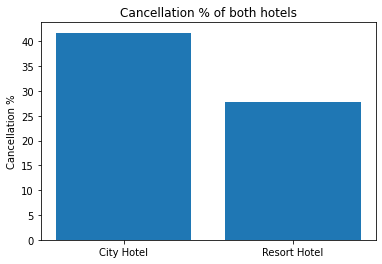

In [32]:
#bar plot to visualize cancellation % for two hotel types
plt.bar(pie_labels,hotel_cancel_rate)
plt.title("Cancellation % of both hotels") #setting title of plot
plt.ylabel("Cancellation %") #setting label of y-axis
plt.show()

<b><h2>2.	Which month has got maximum number of cancellations?</h2></b>

Calculating cancellation for each month for both types of hotel.

In [33]:
hotel_cancel=hotel_data[hotel_data["is_canceled"]==1]#to get records for all bookings which were cancelled
hotel_cancel.head(5)#to see first few rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_week_no,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,avg_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_days_of_stay,arrival_date,total_guest
8,Resort Hotel,1,85,2015,7,27,1,0,3,2,...,0,Transient,82.0,0,1,Canceled,2015-05-06,3,2015-07-01,2
9,Resort Hotel,1,75,2015,7,27,1,0,3,2,...,0,Transient,105.5,0,0,Canceled,2015-04-22,3,2015-07-01,2
10,Resort Hotel,1,23,2015,7,27,1,0,4,2,...,0,Transient,123.0,0,0,Canceled,2015-06-23,4,2015-07-01,2
27,Resort Hotel,1,60,2015,7,27,1,2,5,2,...,0,Transient,107.0,0,2,Canceled,2015-05-11,7,2015-07-01,2
32,Resort Hotel,1,96,2015,7,27,1,2,8,2,...,0,Transient,108.3,0,2,Canceled,2015-05-29,10,2015-07-01,2


In [34]:
cancel_month = hotel_cancel.groupby("hotel")["arrival_date_month"].value_counts()#month wise data for each hotel
print(cancel_month)#print the result

hotel         arrival_date_month
City Hotel    5                     3653
              8                     3602
              6                     3528
              4                     3465
              7                     3306
              10                    3268
              9                     3110
              3                     2386
              2                     1901
              12                    1740
              11                    1661
              1                     1482
Resort Hotel  8                     1637
              7                     1436
              4                     1059
              5                     1024
              6                     1007
              9                     1006
              10                     978
              2                      795
              3                      763
              12                     631
              11                     461
              1         

graphical calculation for the month with most number of cancellation

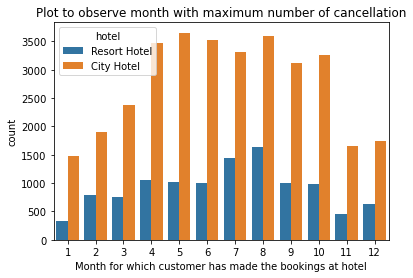

In [35]:
plt.figure()
sns.countplot(x='arrival_date_month',hue='hotel',data=hotel_cancel) #countplot to count bookings for each month
plt.title("Plot to observe month with maximum number of cancellation")#setting title 
plt.xlabel("Month for which customer has made the bookings at hotel")#setting label for x-axis
plt.show()

It can be seen that for city hotel maximum cancellations were made for MAY month and for resort hotel maximum number of cancellation were done for AUGUST month.

<b><h2>3.What was the cancellation rate over three  years?</h2></b>

In [36]:
#to get data for all customers who cancelled their bookings
df_cancel_bookings = hotel_data[hotel_data['is_canceled']==1]

#to count total number of bookings cancelled each year for both types of hotel
cancel_year_count = df_cancel_bookings.groupby(['arrival_date_year','hotel'])["is_canceled"].count()
cancel_year_count 

arrival_date_year  hotel       
2015               City Hotel       6004
                   Resort Hotel     2138
2016               City Hotel      15407
                   Resort Hotel     4930
2017               City Hotel      11691
                   Resort Hotel     4054
Name: is_canceled, dtype: int64

In [37]:
# a list of year
year = [2015,2016,2017]

#a list with hotel name
hotel = ['City Hotel','Resort Hotel']

#empty list to store cancellation percentages
cancel_yearwise_per = []

#for loop to calculate cancellation percentage for each year for both the hotels
for a in year: 
    for b in hotel:
        #booking cancellation each year for both hotels
        percentage = (cancel_year_count[a,b]/cancel_year_count[a].sum())*100 
        
        #store year, hotel name and percentage value in cancel_data variable
        cancel_data = [a,b,percentage]
        
        #add variable to the list cancel_yearwise_per
        cancel_yearwise_per.append(cancel_data)

#convert list into the dataframe        
cancel_yearwise_per = pd.DataFrame(np.array(cancel_yearwise_per),columns = ["Year","Hotel","Cancel Percentage %"]) 
cancel_yearwise_per

,Year,Hotel,Cancel Percentage %
0,2015,City Hotel,73.74109555391796
1,2015,Resort Hotel,26.25890444608204
2,2016,City Hotel,75.75846978413729
3,2016,Resort Hotel,24.241530215862714
4,2017,City Hotel,74.252143537631
5,2017,Resort Hotel,25.747856462369008


In [38]:
#convert datatype of year and cancel % into int form 
cancel_yearwise_per[["Year","Cancel Percentage %"]] = cancel_yearwise_per[["Year","Cancel Percentage %"]].astype('float')
cancel_yearwise_per.dtypes

Year                   float64
Hotel                   object
Cancel Percentage %    float64
dtype: object

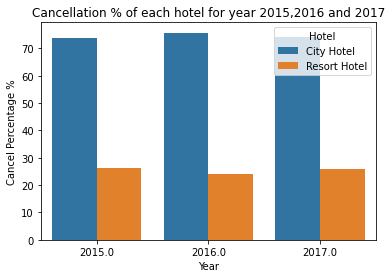

In [39]:
#bar plot for cancellation % for each year for both the hotels
sns.barplot(x="Year",y="Cancel Percentage %",hue="Hotel",data = cancel_yearwise_per)
plt.title("Cancellation % of each hotel for year 2015,2016 and 2017")
plt.show()

It can be seen that for resort hotel the cancellation percentage first decreased from year 2015 (26%) to 2016 (24%) and then increased from 2016 to 2017 (25.7%). For City hotel it initially increased from 73.7% to 75.7% in year 2016 and then got decreased again in year 2017 to 74.2%. We can say that cancellation % for year 2015 and 2017 was almost same. It also shows that hotel management did not take any steps to reduce the % of cancellations over the two year.

<b><h2>4. Which type of guest(family/couple) made a greater number of cancellations? </h2> </b>

To get record for all the customers that visited the hotel with family . i.e with children / babies 

In [40]:
#clients without children and babies are most likely to be couples . So getting records for all couples who did the bookings with both hotels
not_family = (hotel_data['children']==0 ) & (hotel_data['babies']==0)

#to get records for all family bookings , all details except the couple booking details (not_family) are fetched.
family_booking = hotel_data[~not_family] #
family_booking.head(7)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_week_no,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,avg_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_days_of_stay,arrival_date,total_guest
13,Resort Hotel,0,18,2015,7,27,1,0,4,2,...,0,Transient,154.77,0,1,Check-Out,2015-07-05,4,2015-07-01,3
45,Resort Hotel,1,47,2015,7,27,2,2,5,2,...,0,Transient,153.00,0,0,Canceled,2015-06-02,7,2015-07-02,4
55,Resort Hotel,0,1,2015,7,27,2,0,1,2,...,0,Transient,107.00,1,2,Check-Out,2015-07-03,1,2015-07-02,4
65,Resort Hotel,0,10,2015,7,27,3,0,2,2,...,0,Transient,153.00,1,0,Check-Out,2015-07-05,2,2015-07-03,4
87,Resort Hotel,1,79,2015,7,27,3,6,15,2,...,0,Transient,108.73,0,2,Canceled,2015-04-15,21,2015-07-03,3
98,Resort Hotel,0,101,2015,7,27,3,2,5,2,...,0,Transient,99.30,1,2,Check-Out,2015-07-10,7,2015-07-03,3
102,Resort Hotel,0,92,2015,7,27,4,2,4,1,...,0,Transient,96.49,0,2,Check-Out,2015-07-10,6,2015-07-04,3


In [41]:
#data for all cancelled family bookings 
family_booking_cancel = family_booking[family_booking['is_canceled']==1]
family_booking_cancel.head(5) #first five rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_week_no,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,avg_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_days_of_stay,arrival_date,total_guest
45,Resort Hotel,1,47,2015,7,27,2,2,5,2,...,0,Transient,153.00,0,0,Canceled,2015-06-02,7,2015-07-02,4
87,Resort Hotel,1,79,2015,7,27,3,6,15,2,...,0,Transient,108.73,0,2,Canceled,2015-04-15,21,2015-07-03,3
105,Resort Hotel,1,26,2015,7,27,4,2,5,2,...,0,Transient,163.00,0,0,Canceled,2015-06-09,7,2015-07-04,4
148,Resort Hotel,1,34,2015,7,28,5,2,4,2,...,0,Transient,163.00,0,0,Canceled,2015-06-17,6,2015-07-05,4
223,Resort Hotel,1,280,2015,7,28,8,2,5,2,...,0,Contract,112.00,0,1,Canceled,2015-04-15,7,2015-07-08,3


In [42]:
#to get the count of number of family bookings done for each hotel type
family_booking_cancel_count =  family_booking_cancel.groupby('hotel')['hotel'].count()
family_booking_cancel_count

hotel
City Hotel      1862
Resort Hotel    1397
Name: hotel, dtype: int64

In [43]:
#function to calculate total number of person that did booking at each type of hotel
def total_booking_count(index):
    total_count = hotel_cancel_count[index]
    return total_count

In [44]:
#total number of bookings with city hotel
total = total_booking_count('City Hotel')#calling function to calculate total
total

33102

In [45]:
#calculating cancellation percentage
city_family_per = (family_booking_cancel_count['City Hotel']/total)*100

#print statement for the result. Final value is round off using round off function
print(f"Cancellation % of families for City Hotel was {round(city_family_per)} %.")

Cancellation % of families for City Hotel was 6 %.


In [46]:
#out of the total bookings cancelled if 4% was cancelled by the familes then remaining from total(100%) would have be cancelled by couples.Using the same logic calculating cancellation percentage for couples by substracting cancellation percentage of families from 100 %
city_couple_per = 100 - city_family_per
print(f"Cancellation % of couples for City Hotel was {round(city_couple_per)} %.")


Cancellation % of couples for City Hotel was 94 %.


This shows that out of total bookings cancelled , 6% of total was cancelled by families visiting rest 94% was cancelled by the couples

In [47]:
#family booking percentage for resort hotel

total = total_booking_count('Resort Hotel')#calling function to calculate total

#calculating percentage
resort_family_per = (family_booking_cancel_count['Resort Hotel']/total)*100

#print statement for the result. Final value is round off using round off function
print(f"Cancellation % of families for Resort Hotel was {round(resort_family_per)} %.")

Cancellation % of families for Resort Hotel was 13 %.


In [48]:
#out of the total bookings cancelled if 4% was cancelled by the familes then remaining from total(100%) would have be cancelled by couples.Using the same logic calculating cancellation percentage for couples by substracting cancellation percentage of families from 100 %
resort_couple_per = 100 - resort_family_per
print(f"Cancellation % of couples for Resort Hotel was {round(resort_couple_per)} %.")

Cancellation % of couples for Resort Hotel was 87 %.


This shows that out of total bookings cancelled , 13% of total was cancelled by families visiting rest 87% was cancelled by the couples.

In [49]:
#creating list with all cancellation percentage values of both types of guest for both hotels .
data = [["City Hotel","Family",round(city_family_per)], ["City Hotel","Couple",round(city_couple_per)], ["Resort Hotel","Family",round(resort_family_per)],["Resort Hotel","Couple",round(resort_couple_per)]]

#converting list into dataframe
guest_data = pd.DataFrame(np.array(data),columns = ["Hotel","Guest","Percentage"]) 
guest_data

,Hotel,Guest,Percentage
0,City Hotel,Family,6
1,City Hotel,Couple,94
2,Resort Hotel,Family,13
3,Resort Hotel,Couple,87


In [50]:
#changing datatype of column percentage to integer
guest_data[["Percentage"]] = guest_data[["Percentage"]].astype('int')
guest_data.dtypes

Hotel         object
Guest         object
Percentage     int32
dtype: object

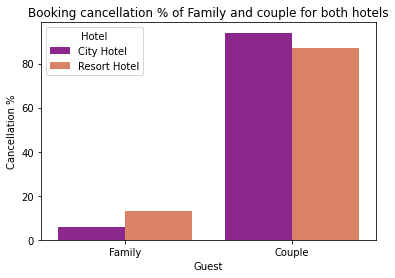

In [51]:
#bar plot cancellation percentages for both the hotels
sns.barplot(x = 'Guest', y ='Percentage',hue = 'Hotel',palette ='plasma',data = guest_data)
plt.title("Booking cancellation % of Family and couple for both hotels")
plt.ylabel('Cancellation %')
plt.show()

From above percentage values, it can be seen that couples are more likely to cancel their bookings as compared to families.

<b><h2> 5. Did cancellation of bookings by family / guest visitors changed over three years ?</h2></b>

In [52]:
#to get the count of number of cancellations done by the family visitors each year (2015,2016,2017)
family_yearwise_cancel = family_booking_cancel.groupby(['arrival_date_year','hotel'])['hotel'].count()
family_yearwise_cancel

arrival_date_year  hotel       
2015               City Hotel       68
                   Resort Hotel    160
2016               City Hotel      990
                   Resort Hotel    550
2017               City Hotel      804
                   Resort Hotel    687
Name: hotel, dtype: int64

In [53]:
# a list of year
year = [2015,2016,2017]

#list containing hotel names
hotel = ['City Hotel','Resort Hotel']

#empty list to store percentage value yearwise for each hotel 
family_yearwise_per = []

#loop to calculate percentage
for a in year:#looping over year
    for b in hotel:#looping over hotel list
        
        #calculating percentage of cancellation for each year
        percentage = (family_yearwise_cancel[a,b]/cancel_year_count[a,b])*100
        #rounding the value and storing it into a variable
        family_data = [b,a,round(percentage)]
        #adding variable to the empty list
        family_yearwise_per.append(family_data)
        
#to convert list into dataframe containing all records of cancellation % year-wise for each kind of hotel - family guest        
guest_yearwise_data = pd.DataFrame(np.array(family_yearwise_per),columns = ["Hotel","Year","Family Percentage %"]) 
guest_yearwise_data


,Hotel,Year,Family Percentage %
0,City Hotel,2015,1
1,Resort Hotel,2015,7
2,City Hotel,2016,6
3,Resort Hotel,2016,11
4,City Hotel,2017,7
5,Resort Hotel,2017,17


In [54]:
#converting datatype into integer
guest_yearwise_data[["Year","Family Percentage %"]] = guest_yearwise_data[["Year","Family Percentage %"]].astype('int')
guest_yearwise_data.dtypes

Hotel                  object
Year                    int32
Family Percentage %     int32
dtype: object

In [55]:
#out of the total bookings cancelled if 1% was cancelled by the family visitors then remaining from total(100%) would have be cancelled by couples.Using the same logic calculating cancellation percentage for couples by substracting cancellation percentage of families from 100 %
val = 100 - guest_yearwise_data['Family Percentage %']
guest_yearwise_data["Couple Percentage%"] = val
guest_yearwise_data

,Hotel,Year,Family Percentage %,Couple Percentage%
0,City Hotel,2015,1,99
1,Resort Hotel,2015,7,93
2,City Hotel,2016,6,94
3,Resort Hotel,2016,11,89
4,City Hotel,2017,7,93
5,Resort Hotel,2017,17,83


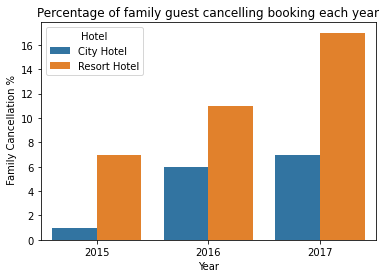

In [56]:
#bar plot family booking cancellation % for both the hotels
sns.barplot(x="Year",y="Family Percentage %",hue="Hotel",data = guest_yearwise_data)
plt.title("Percentage of family guest cancelling booking each year")
plt.ylabel(" Family Cancellation %")
plt.show()

It can be seen that cancellation % of families for both type of hotels increased over the year.

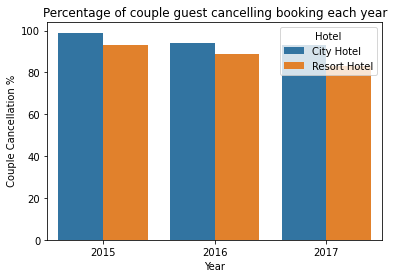

In [57]:
#bar plot couple booking cancellation % for both the hotels
sns.barplot(x="Year",y="Couple Percentage%",hue="Hotel",data = guest_yearwise_data)
plt.title("Percentage of couple guest cancelling booking each year")
plt.ylabel(" Couple Cancellation %")
plt.show()

It can be seen that cancellation % of couples for both type of hotels decreased over the year.

<b><h2>6. How many customers were assigned different rooms than those reserved who cancelled their bookings?</h2></b>

In [58]:
#data for all customer whom were assigned different room 
differ_data = (hotel_data['reserved_room_type']!= hotel_data['assigned_room_type'])
differ_room = hotel_data[differ_data]
len(differ_room)#total number of customers who were assigned different room
print(f"Total number of customers who were assigned diiferent rooms than those they booked for are - {len(differ_room)}")

Total number of customers who were assigned diiferent rooms than those they booked for are - 14917


In [59]:
#customers who had cancelled there current booking
cancelled_data = hotel_data['is_canceled']==1
curr_cancelled = hotel_data[cancelled_data]

len(curr_cancelled)#total number of people who have cancelled their current booking
print(f"Total number of customers who cancelled their bookings with the hotel - {len(curr_cancelled)}")

Total number of customers who cancelled their bookings with the hotel - 44224


In [60]:
#customers who were assigned different room and they have cancelled their currect booking
diff_room_curr_cancelled = hotel_data[differ_data & cancelled_data]

#total number of customers who were assigned different room and they have cancelled the booking
print(f"Total number of customers who were assigned different rooms and have cancelled there booking are - {len(diff_room_curr_cancelled)}  people were assigned different room and have cancelled their booking ")

Total number of customers who were assigned different rooms and have cancelled there booking are - 802  people were assigned different room and have cancelled their booking 


In [61]:
#percentage of people who had cancelled their bookings and were assigned different room
percentage = len(diff_room_curr_cancelled)/len(curr_cancelled)*100
print(f"{percentage} of the total people who were assigned different room , who have cancelled their current booking")

1.81349493487699 of the total people who were assigned different room , who have cancelled their current booking


 It can be seen that only 1.8% percentage of the total people who cancelled their booking was assigned different room. Thus we can say that assignment of room cannot be the main reason for customers to cancel their bookings with the hotel.

<b><h2>7.How many customers with previous booking cancellation made cancellation to their current bookings?</h2></b>

In [62]:
#data of all customers who have cancelled their previous booking
pre_cancelled = hotel_data['previous_cancellations']==1 

In [63]:
#customers who have cancelled their previous booking as well as current booking
both = hotel_data[pre_cancelled & cancelled_data]
print (f"{len(both)} customers who have cancelled their previous booking as well as current booking")

5714 customers who have cancelled their previous booking as well as current booking


In [64]:
#percentage of people who have previously made the cancellation have cancelled their current bookings as well.
percentage = len(both)/len(hotel_data[pre_cancelled])*100
print(f"{percentage} of the total people who had cancelled their previous bookings , have cancelled their current booking as well.")

94.43067261609652 of the total people who had cancelled their previous bookings , have cancelled their current booking as well.


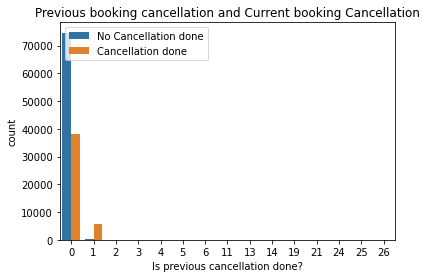

In [65]:
#count plot for previous cancellation. 0 represents no previous booking or no previous booking cancelled. 1 represents cancellation of previous bookings(for old customers).
sns.countplot(x ='previous_cancellations',hue= 'is_canceled', data = hotel_data)
plt.xlabel('Is previous cancellation done?')
plt.title('Previous booking cancellation and Current booking Cancellation')
plt.legend(["No Cancellation done","Cancellation done"])
plt.show()

From above data it can be seen that about 94 % of total people who had cancelled their bookings previously also made cancellation with their current booking.Thus customers with previous cancellation are more likely to cancel their current booking as well. 

<b><h2>8. What kind of deposit was made by the customers who did cancellation? </h2></b>

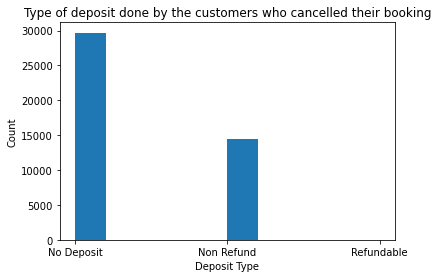

In [66]:
#to observe the deposit type of the people who cancelled their bookings
plt.hist(curr_cancelled['deposit_type'])#curr_cancelled contains data for all bookings that were cancelled
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.title('Type of deposit done by the customers who cancelled their booking')
plt.show()

The customers who cancelled the bookings were generally who did not pay any depoist to the hotel.So if customer doesnot pay any deposit he/she is more likely to cancel the booking with hotel

<b><h2> 9. How many change requests were made by customers who cancelled their booking? </h2></b>

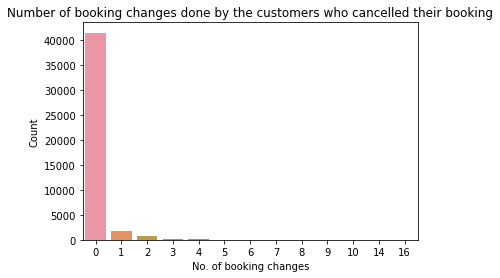

In [67]:
#count plot to count the number of booking changes that were made by the customers who cancelled their bookings
sns.countplot(x = 'booking_changes',data = curr_cancelled)
plt.xlabel('No. of booking changes')
plt.ylabel('Count')
plt.title('Number of booking changes done by the customers who cancelled their booking')
plt.show()

In [68]:
#number of booking changes that were made by most of the customer who cancelled their booking
curr_cancelled['booking_changes'].mode()

0    0
dtype: int64

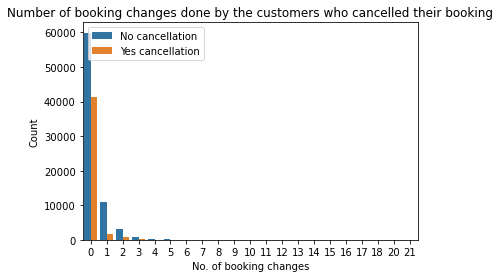

In [69]:
sns.countplot(x = 'booking_changes',hue = 'is_canceled',data = hotel_data)
plt.xlabel('No. of booking changes')
plt.ylabel('Count')
plt.title('Number of booking changes done by the customers who cancelled their booking')
plt.legend(["No cancellation","Yes cancellation"])
plt.show()

Graph shows that people who did cancellation made less or almost zero change request for their bookings.

<b><h2>10. Did cancellation increase with increase in lead time?</h2></b>

In [70]:
hotel_data.groupby('is_canceled')['lead_time'].describe() #summary statistics of the lead days for customers who cancelled their booking

,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
0,75166.0,79.984687,91.109888,0.0,9.0,45.0,124.0,737.0
1,44224.0,144.848815,118.624829,0.0,48.0,113.0,214.0,629.0


In above table 0 represents no cancellation and 1 represents cancellation.
It can be seen that more than 50% of people who cancelled their booking were having lead days of more than 100 days. So, a person with more lead days is more likely to cancel their bookings with the hotel.
Leads days for customers who did not cancelled the bookings is less for more number of the cases. More than 50% of the people were having lead days of less than 45 days. 

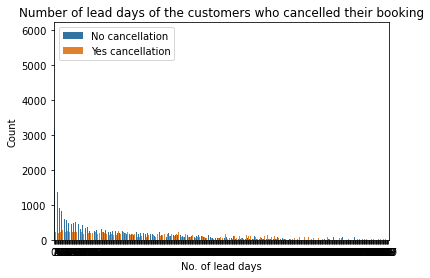

In [71]:
# figure showing distribution of lead days w.r.t booking cancellation
sns.countplot(x = 'lead_time',hue = 'is_canceled',data = hotel_data)
plt.xlabel('No. of lead days')
plt.ylabel('Count')
plt.title('Number of lead days of the customers who cancelled their booking')
plt.legend(["No cancellation","Yes cancellation"])
plt.show()

<b><h1> Predicting whether customer will cancel their booking or not </h1></b>

<b><h2>Construction of Model </h2></b>

removing irrelevant columns

In [72]:
#as we have already the count of total number of guest visiting hotel in a separate column. so we will delete column containing number of adults,babies and children.

#separate column for arrival date ,arrival month ,arrival year can also be deletd as we have column with arrival date containing all information
["stays_in_week_nights","stays_in_weekend_nights","children","babies","adults"]
del hotel_data['children']
del hotel_data['babies']
del hotel_data['adults']

#also we have data for number of days guest stays at hotel . so removing separate week days and weekend column
del hotel_data['stays_in_weekend_nights']
del hotel_data['stays_in_week_nights']

#separate column for arrival date ,arrival month ,arrival year can also be deletd as we have column with arrival date containing all information
del hotel_data['arrival_date_day_of_month']
del hotel_data['arrival_date_month']
del hotel_data['arrival_date_year']

hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_week_no',
       'type_of_meal_booked', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'avg_daily_rate',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_days_of_stay',
       'arrival_date', 'total_guest'],
      dtype='object')

convert categorical entries into numeric values

In [73]:
hotel_data["hotel"] = hotel_data["hotel"].replace({'City Hotel':0,'Resort Hotel':1})
hotel_data["hotel"].astype(int)#converting datatype to int

0         1
1         1
2         1
3         1
4         1
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: hotel, Length: 119390, dtype: int32

In [74]:
hotel_data["deposit_type"] = hotel_data["deposit_type"].replace({'No Deposit':0,'Non Refund':1,'Refundable':2})
hotel_data["deposit_type"].astype(int)#converting datatype to int

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: deposit_type, Length: 119390, dtype: int32

In [75]:
hotel_data["reservation_status"] = hotel_data["reservation_status"].replace({'Check-Out':0,'Canceled':1,'No-Show':2})
hotel_data["reservation_status"].astype(int)#converting datatype to int

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: reservation_status, Length: 119390, dtype: int32

In [76]:
hotel_data["customer_type"] = hotel_data["customer_type"].replace({'Transient':0,'Contract':1,'Transient-Party':2,'Group':3})
hotel_data["customer_type"].astype(int)#converting datatype to int

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: customer_type, Length: 119390, dtype: int32

In [77]:
# creating instance of labelencoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# label encoding for all columns containing string values
hotel_data['type_of_meal_booked'] = labelencoder.fit_transform(hotel_data['type_of_meal_booked'])
hotel_data['country'] = labelencoder.fit_transform(hotel_data['country'])
hotel_data['market_segment'] = labelencoder.fit_transform(hotel_data['market_segment'])
hotel_data['distribution_channel'] = labelencoder.fit_transform(hotel_data['distribution_channel'])
hotel_data['reserved_room_type'] = labelencoder.fit_transform(hotel_data['reserved_room_type'])
hotel_data['assigned_room_type'] = labelencoder.fit_transform(hotel_data['assigned_room_type'])

hotel_data.head(10)

,hotel,is_canceled,lead_time,arrival_week_no,type_of_meal_booked,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,...,days_in_waiting_list,customer_type,avg_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_days_of_stay,arrival_date,total_guest
0,1,0,342,27,0,135,3,1,0,0,...,0,0,0.0,0,0,0,2015-07-01,0,2015-07-01,2
1,1,0,737,27,0,135,3,1,0,0,...,0,0,0.0,0,0,0,2015-07-01,0,2015-07-01,2
2,1,0,7,27,0,59,3,1,0,0,...,0,0,75.0,0,0,0,2015-07-02,1,2015-07-01,1
3,1,0,13,27,0,59,2,0,0,0,...,0,0,75.0,0,0,0,2015-07-02,1,2015-07-01,1
4,1,0,14,27,0,59,6,3,0,0,...,0,0,98.0,0,1,0,2015-07-03,2,2015-07-01,2
5,1,0,14,27,0,59,6,3,0,0,...,0,0,98.0,0,1,0,2015-07-03,2,2015-07-01,2
6,1,0,0,27,0,135,3,1,0,0,...,0,0,107.0,0,0,0,2015-07-03,2,2015-07-01,2
7,1,0,9,27,1,135,3,1,0,0,...,0,0,103.0,0,1,0,2015-07-03,2,2015-07-01,2
8,1,1,85,27,0,135,6,3,0,0,...,0,0,82.0,0,1,1,2015-05-06,3,2015-07-01,2
9,1,1,75,27,2,135,5,3,0,0,...,0,0,105.5,0,0,1,2015-04-22,3,2015-07-01,2


In [78]:
hotel_data.dtypes #to check the datatype

hotel                                      int64
is_canceled                                int64
lead_time                                  int64
arrival_week_no                            int64
type_of_meal_booked                        int32
country                                    int32
market_segment                             int32
distribution_channel                       int32
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                         int32
assigned_room_type                         int32
booking_changes                            int64
deposit_type                               int64
agent                                      int32
days_in_waiting_list                       int64
customer_type                              int64
avg_daily_rate                           float64
required_car_parking_spaces                int64
total_of_special_req

In [79]:
#checking correlation of each column with the target variable 'is_cancelled' and printing the values
corr = hotel_data.corr() 
print (corr['is_canceled'].sort_values(ascending=False), '\n') #top 10

is_canceled                       1.000000
reservation_status                0.980601
deposit_type                      0.468634
lead_time                         0.293123
country                           0.267502
distribution_channel              0.167600
previous_cancellations            0.110133
market_segment                    0.059338
days_in_waiting_list              0.054186
avg_daily_rate                    0.047557
total_guest                       0.046522
total_days_of_stay                0.017779
arrival_week_no                   0.008148
type_of_meal_booked              -0.017678
agent                            -0.046529
previous_bookings_not_canceled   -0.057358
reserved_room_type               -0.061282
is_repeated_guest                -0.084793
customer_type                    -0.135819
hotel                            -0.136531
booking_changes                  -0.144381
assigned_room_type               -0.176028
required_car_parking_spaces      -0.195498
total_of_sp

removing column reservation_status, as it is highly correlated to out target variable ('is_canceled') and it contains cancellation details . 

In [80]:
hotel_data = hotel_data.drop(columns = ['reservation_status'],axis=1)
hotel_data = hotel_data.drop(columns = ['arrival_date'],axis=1)
hotel_data = hotel_data.drop(columns = ['reservation_status_date'],axis=1)

Checking correlation between the features

In [81]:
corr = hotel_data.corr()
print (corr['is_canceled'].sort_values(ascending=False), '\n') 

is_canceled                       1.000000
deposit_type                      0.468634
lead_time                         0.293123
country                           0.267502
distribution_channel              0.167600
previous_cancellations            0.110133
market_segment                    0.059338
days_in_waiting_list              0.054186
avg_daily_rate                    0.047557
total_guest                       0.046522
total_days_of_stay                0.017779
arrival_week_no                   0.008148
type_of_meal_booked              -0.017678
agent                            -0.046529
previous_bookings_not_canceled   -0.057358
reserved_room_type               -0.061282
is_repeated_guest                -0.084793
customer_type                    -0.135819
hotel                            -0.136531
booking_changes                  -0.144381
assigned_room_type               -0.176028
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_ca

It can be seen that lead_time ,deposit_time,country,distribution_channel highly influence the target variable.

<b><h4>Splitting the variables and building random forest model and decision tree</h4></b>

In [82]:
x = hotel_data.drop(['is_canceled'],axis=1)#independent variable
y = hotel_data['is_canceled']#dependent variable

# Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [83]:
#using minmaxscaler to transform all training data within a range
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<b>Random Forest Model</b>

In [84]:
# Random forest model creation
mdl = ensemble.RandomForestClassifier(n_estimators = 100, random_state = 45)
# Train the model using the training sets
mdl.fit(X_train, y_train)
# Make predictions using the testing set
y_predicted = mdl.predict(X_test)
 
#evaluation   
print ("Accuracy of Random Forest model : ", accuracy_score(y_test,y_predicted)*100) 
      
print("Report of Random Forest model : ", classification_report(y_test, y_predicted)) 

# print("Confusion Matrix of random forest model : ", confusion_matrix(y_test, y_predicted))

Accuracy of Random Forest model :  89.22439065248345
Report of Random Forest model :                precision    recall  f1-score   support

           0       0.90      0.94      0.92     15041
           1       0.88      0.82      0.85      8837

    accuracy                           0.89     23878
   macro avg       0.89      0.88      0.88     23878
weighted avg       0.89      0.89      0.89     23878



Calculating feature importance score

In [85]:
#using the feature importance variable to see feature importance scores
feature_imp = pd.Series(mdl.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

lead_time                         0.153277
country                           0.120950
deposit_type                      0.112229
avg_daily_rate                    0.097664
arrival_week_no                   0.082360
total_of_special_requests         0.060192
agent                             0.058253
market_segment                    0.048890
total_days_of_stay                0.048325
previous_cancellations            0.035982
customer_type                     0.029213
assigned_room_type                0.027762
required_car_parking_spaces       0.023493
booking_changes                   0.022509
total_guest                       0.018072
reserved_room_type                0.016089
distribution_channel              0.014049
type_of_meal_booked               0.013304
hotel                             0.008928
previous_bookings_not_canceled    0.004137
days_in_waiting_list              0.002250
is_repeated_guest                 0.002071
dtype: float64

Visualizing feature importance score using barplot

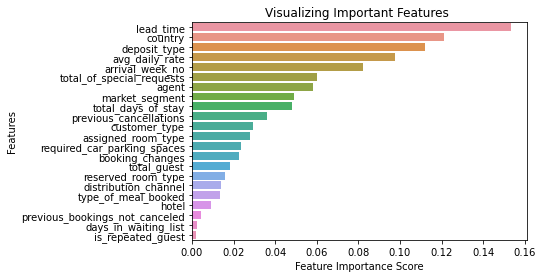

In [86]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Adding labels to graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features ")
plt.show()

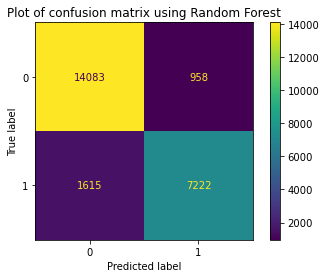

In [87]:
#to plot confusion matrix 
plot_confusion_matrix(mdl, X_test, y_test)# confusion matrix using test data
plt.title('Plot of confusion matrix using Random Forest')
plt.show()

<b>Decision Tress Model</b>

In [88]:
# decision tree model -creation
mdl = DecisionTreeClassifier(criterion = "entropy",max_depth = 1300)
# Train the model using the training sets
mdl.fit(X_train, y_train)
# Make predictions using the testing set
y_predicted = mdl.predict(X_test)

#evaluation
print ("Accuracy for decision tree : ", accuracy_score(y_test,y_predicted)*100) 
      
print("Report for decision tree :  ", classification_report(y_test, y_predicted)) 

# print("Confusion Matrix: ", confusion_matrix(y_test, y_predicted))

Accuracy for decision tree :  85.53480190970768
Report for decision tree :                 precision    recall  f1-score   support

           0       0.89      0.88      0.88     15041
           1       0.80      0.81      0.81      8837

    accuracy                           0.86     23878
   macro avg       0.84      0.85      0.85     23878
weighted avg       0.86      0.86      0.86     23878



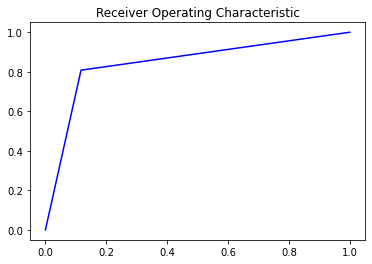

In [89]:
#calculating values for false positive, true positive 
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)#calculating area under roc curve value 

#plotting roc curve 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

In [90]:
roc_auc

0.8456229070588297

roc value near to 1 defines high performance efficiency of a model .

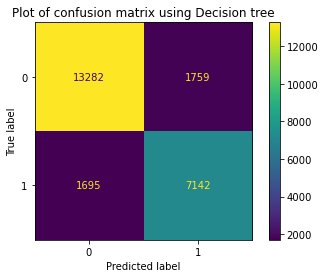

In [91]:
#to plot confusion matrix 
plot_confusion_matrix(mdl, X_test, y_test) #confusion matrix with test set
plt.title('Plot of confusion matrix using Decision tree')
plt.show()